<a href="https://colab.research.google.com/github/raulFuzita/cct_ai/blob/CA3/raul_macedo_fuzita_AI_DV_DP_ICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CCT College Dublin Continuous Assessment**

## **Assessment Information**

Programme Title:             BSc (Hons) in Computing and IT Y4

Cohort:                      Y4

Module Title(s):             Artificial Intelligence

Assignment Title:            AI_DV_DP_Lv8_ICA_v1

Lecturer(s):                 David McQuaid

Issue Date:                  13/12/2021

Submission Deadline Date:    16/01/2022

## **Student Information**

Name:                        Raul Macedo Fuzita

ID:                          2018337



## Jupyter Notebook Information <font color='red'>(Important)</font>

<p align="justify">
&emsp;&emsp;This assignment was performed on Google Colab in Jupyter Notebook. This notebook contains advanced features such as HTML tags, Jupyter Notebook form components compatible with the version below or above, and Widgets components.

&emsp;&emsp;If you are running on your local machine, please check if your Jupyter Notebook has the same version or above. This notebook was not tested in an old version, so I cannot guarantee support for the legacy notebooks.

&emsp;&emsp;If you are not sure what Jupyter Notebook version you have, you will find a command to check the version. You can access this material on my Github account, available at:  <a href="https://github.com/raulFuzita/cct_ai/tree/CA2">https://github.com/raulFuzita/cct_ai/tree/CA2</a>
</p>

```
jupyter core     : 4.5.0
jupyter-notebook : 5.2.2
qtconsole        : 4.5.2
ipython          : 5.5.0
ipykernel        : 4.10.1
jupyter client   : 5.3.1
jupyter lab      : not installed
nbconvert        : 5.5.0
ipywidgets       : 7.5.0
nbformat         : 4.4.0
traitlets        : 4.3.2
```

&emsp;&emsp;Make your own changes or have a copy in you Google Drive. Go to `File > Save a copy in Drive`

In [ ]:
#@markdown 👈 **Please, run this code cell to check your Jupyter Notebook version.** <font color="lightgreen">(Recommended)</font>
!jupyter --version

jupyter core     : 4.5.0
jupyter-notebook : 5.2.2
qtconsole        : 4.5.2
ipython          : 5.5.0
ipykernel        : 4.10.1
jupyter client   : 5.3.1
jupyter lab      : not installed
nbconvert        : 5.5.0
ipywidgets       : 7.5.0
nbformat         : 4.4.0
traitlets        : 4.3.2


# Tasks for Artificial Intelligence

## Task 1

1) In honour of the hard work that the fire officers are doing, the community has decided to build a
new fire station for them. There are seven fire officers and four offices. Because there are more
fire officers than offices, some fire officers have to be in the same offices as others. However, the
fire officers are very picky about who they share with. The community administration is having
trouble assigning fire officers to offices. They have asked you to plan where each fire officer goes.

The fire officers are **Phylis**, **Ann**, **Henry**, **Eva**, **Bill**, **Mark**, and **Bob**.

They have given you the plans of the fire station.

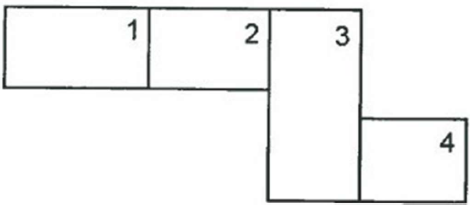

Each numbered area is an office in the fire station. Multiple officers can go into the same office,
and not all offices have to be filled.

Each fire person has restrictions about where they can be placed.
1. Phylis and Eva dont get on, and do not want to be in the same office.
2. Mark and Bob are best friends, and have to be in the same office.
3. Henry listens to loud music. Only Eva will share his office.
4. Eva doesn't talk to Mark, Bob, and Bill.
5. Ann is always late but is a great fire officer. To hide that Ann is always late, Ann cannot be in
either the same office or in an office adjacent to Phylis or Eva.
6. Phylis annoys Bill, so Bill doesn't want to be in Phylis's office.
7. Phylis is the fire chief, so she wants to be in office 1.

Using any CSP (Constraint Satisfaction Problem) framework, discover if the above problem can be
solved and if so detail who would be in each office.

In [ ]:
#@title Import Necessary Resources


import pandas as pd
import numpy as np
import ipywidgets as widgets

df_fire_officers = pd.read_csv("https://raw.githubusercontent.com/raulFuzita/cct_ai/CA3/fire_station.csv")
df_rooms = pd.read_csv("https://raw.githubusercontent.com/raulFuzita/cct_ai/CA3/rooms_location.csv")

df_fire_officers.columns = df_fire_officers.columns.str.lower()
df_rooms.columns = df_rooms.columns.str.lower()

In [ ]:
#@title Constraint Satisfaction Problem (CSP)

# csp.py
# From Classic Computer Science Problems in Python Chapter 3
# Copyright 2018 David Kopec
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
from typing import Generic, TypeVar, Dict, List, Optional
from abc import ABC, abstractmethod

V = TypeVar('V') # variable type
D = TypeVar('D') # domain type


# Base class for all constraints
class Constraint(Generic[V, D], ABC):
    # The variables that the constraint is between
    def __init__(self, variables: List[V]) -> None:
        self.variables = variables

    # Must be overridden by subclasses
    @abstractmethod
    def satisfied(self, assignment: Dict[V, D]) -> bool:
        ...


# A constraint satisfaction problem consists of variables of type V
# that have ranges of values known as domains of type D and constraints
# that determine whether a particular variable's domain selection is valid
class CSP(Generic[V, D]):
    def __init__(self, variables: List[V], domains: Dict[V, List[D]]) -> None:
        self.variables: List[V] = variables # variables to be constrained
        self.domains: Dict[V, List[D]] = domains # domain of each variable
        self.constraints: Dict[V, List[Constraint[V, D]]] = {}
        for variable in self.variables:
            self.constraints[variable] = []
            if variable not in self.domains:
                raise LookupError("Every variable should have a domain assigned to it.")

    def add_constraint(self, constraint: Constraint[V, D]) -> None:
        for variable in constraint.variables:
            if variable not in self.variables:
                raise LookupError("Variable in constraint not in CSP")
            else:
                self.constraints[variable].append(constraint)

    # Check if the value assignment is consistent by checking all constraints
    # for the given variable against it
    def consistent(self, variable: V, assignment: Dict[V, D]) -> bool:
        for constraint in self.constraints[variable]:
            if not constraint.satisfied(assignment):
                return False
        return True

    def backtracking_search(self, assignment: Dict[V, D] = {}) -> Optional[Dict[V, D]]:
        # assignment is complete if every variable is assigned (our base case)
        if len(assignment) == len(self.variables):
            return assignment

        # get all variables in the CSP but not in the assignment
        unassigned: List[V] = [v for v in self.variables if v not in assignment]

        # get the every possible domain value of the first unassigned variable
        first: V = unassigned[0]
        for value in self.domains[first]:
            local_assignment = assignment.copy()
            local_assignment[first] = value
            # if we're still consistent, we recurse (continue)
            if self.consistent(first, local_assignment):
                result: Optional[Dict[V, D]] = self.backtracking_search(local_assignment)
                # if we didn't find the result, we will end up backtracking
                if result is not None:
                    return result
        return None

In [ ]:
#@title Conversor from DataFrame into Constraint Dictionary


def split(col):
    if type(col) == str and ';' in col:
        return [item.strip() for item in col.split(';')]  
    else: 
        return [col] if col != None else col

def df_to_constraintdict(df):
    df = df.where(df.notnull(), None)
    tmp_dict = dict()
    for index, row in df.iterrows():

        tmp_dict[row['officers']] = {
            'yes': split(row['yes']),
            'no': split(row['no']),
            'office': row['office'],
            'no_office_adjacent': split(row['no_office_adjacent']),
        }
    return tmp_dict

In [ ]:
#@title Graph Class To Plot Rooms

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

class RoomsGraph:

    colorpalette = {
        0: (127, 127, 127), # gray
        1: (31, 119, 180), # blue
        2: (255, 127, 14), # red
        3: (44, 160, 44), # green
        4: (214, 39, 40), # orange
        5: (148, 103, 189), # purple
        6: (188, 189, 34), # olive
        7: (23, 190, 207), # cyan
        8: (227, 119, 194), # pink
        9: (140, 86, 75), # brown
    }

    def __init__(self, rooms: dict=dict(), components: dict=dict(), figsize: tuple=(12, 8)) -> None:
        self.colors = []
        self.plt = plt
        self.plt.rcParams["figure.figsize"]=figsize
        fig, ax = self.plt.subplots()
        self.fig = fig
        self.ax = ax
        self.setGrid(True)
        self.addRooms(rooms)
        self.addComponents(components)
        self.setComponentSize(14)
        self.setTite('Rooms\n')

    def _RGBdecToPerc(self, r, g=0, b=0, a=None, output=None) -> tuple or list: 
        if r > 255: r = 255
        if g > 255: g = 255
        if b > 255: b = 255
        perc = (round(r/255,2),round(g/255,2),round(b/255,2))
        if a != None: perc = perc + (a if a <= 1 else 1,)
        if output==list: return list(perc)
        else: return perc

    def _color(self, room: int) -> tuple:
        op = room % 10
        room *= 5
        ch = room if room <= 255 else room % 255
        r = self.colorpalette[op][0]+ch
        g = self.colorpalette[op][1]+ch
        b = self.colorpalette[op][2]+ch
        return self._RGBdecToPerc(r, g, b)

    def setGrid(self, flag: bool):
        self.ax.grid(flag)
        return self

    def setTite(self, title: str, fontsize: int=20):
        self.ax.set_title(title, fontsize=fontsize)
        return self

    def setXLabel(self, label: str, labelsize: int=20):
        self.plt.rc('axes', labelsize=labelsize)
        self.ax.set_xlabel(label)
        return self

    def setYLabel(self, label: str, labelsize: int=20):
        self.plt.rc('axes', labelsize=labelsize)
        self.ax.set_ylabel(label)
        return self

    def addRooms(self, rooms: dict):
        self.rooms = rooms
        for room in rooms:
            self.colors.append(self._color(room))
        return self

    def addComponents(self, components: dict):
        self.components = components
        return self

    def setComponentSize(self, fontsize: int):
        self.compSize = fontsize
        return self

    def _yieldComponents(self) -> None:
        roomfreq = dict()
        for i in self.components:
            num = self.components[i]
            roomfreq[num] = roomfreq[num]+1 if num in roomfreq else 1
            x = (self.rooms[num]['x']+5)
            y = (self.rooms[num]['y']+self.rooms[num]['height'])
            y -= (roomfreq[num] * 6)
            self.ax.annotate(i, (x, y), fontsize=self.compSize)

    def _yieldRooms(self) -> None:
        count = 0
        for i in self.rooms:
            room = self.rooms[i]
            self.ax.broken_barh(
                [(room['x'], room['width'])], 
                (room['y'], room['height']), 
                facecolors=self.colors[count])
            count+=1

    def _yieldLegend(self) -> None:
        legends = list()
        for i in range(len(self.rooms)):
            legends.append(mpatches.Patch(color=self.colors[i], label=(i+1)))
        plt.legend(handles=legends)

    def show(self) -> None:
        self._yieldRooms()
        self._yieldLegend()
        self._yieldComponents()
        self.plt.show()

In [ ]:
#@title Constraint Concrete Class

from typing import Dict, List, Optional

class FireStation(Constraint[str, int]):
    def __init__(self, officer: str, officers: List[str], constraints: Dict[str, object]) -> None:
        super().__init__(officers)
        self.officer = officer
        self.officers: List[str] = officers
        self.constraints: Dict[str, object] = constraints

    def validate(self, assignment: Dict[int, str]) -> bool:
        for i in self.constraints:
            constraint = self.constraints[self.officer]
            notwork = constraint['no']
            work = constraint['yes']
            mustbe = constraint['office']
            noadjoffice = constraint['no_office_adjacent']
            if notwork != None:
                for j in notwork:
                    if self.officer in assignment and j in assignment:
                        if assignment[self.officer] == assignment[j]:
                            return False
            if work != None:
                for j in work:
                    if self.officer in assignment and j in assignment:
                        if assignment[self.officer] != assignment[j]:
                            return False
            if mustbe != None:
                if self.officer in assignment: 
                    if assignment[self.officer] != mustbe:
                        return False
            if noadjoffice != None:
                for j in noadjoffice:
                    if self.officer in assignment and j in assignment:
                        diff = assignment[self.officer] - assignment[j]
                        if diff >= -1 and diff <= 1:
                            return False
        return True

    def satisfied(self, assignment: Dict[int, str]) -> bool:
        return self.validate(assignment)

In [ ]:
#@title Main Method

if __name__ == "__main__":

    constraints = df_to_constraintdict(df_fire_officers)
    rooms = df_rooms.set_index('rooms').T.to_dict()

    variables: List[str] = list(constraints.keys())
    domains: Dict[str, List[int]] = {}
    for variable in variables:
        domains[variable] = list(rooms) 

    csp: CSP[str, int] = CSP(variables, domains)
    for variable in list(constraints.keys()):
        csp.add_constraint(FireStation(variable, variables, constraints))
    solution: Optional[Dict[str, int]] = csp.backtracking_search()

    print("No solution found!")  if solution is None else print(solution)

{'Phylis': 1, 'Ann': 4, 'Henry': 2, 'Eva': 2, 'Bill': 3, 'Mark': 1, 'Bob': 1}


In [ ]:
#@title Plot Results If There is an Answer

grid = widgets.Checkbox(value=True,description='Grid')

if solution is not None:
    @widgets.interact(value=grid)
    def render(value):
        rg = RoomsGraph(rooms)
        rg.setTite('Fire Station').setGrid(value).addComponents(solution)
        rg.show()
else:
    print("No solution found!")

interactive(children=(Checkbox(value=True, description='Grid'), Output()), _dom_classes=('widget-interact',))

In [ ]:
# {'Phylis': 1, 'Ann': 4, 'Henry': 2, 'Eva': 2, 'Bill': 3, 'Mark': 1, 'Bob': 1}

## Task 2

2) Discuss in detail how using Constraint Satisfaction finds an answer or finds no solution to the
problem in Tasks for Artificial Intelligence part 1. How does this differ from standard algorithmic
solutions?






<p style="text-align: justify">
&emsp;&emsp;Constraint Satisfaction Problem (or CSP) is composed of a set of variables {X1, X2, …, Xn}, {D1, D2, …, Dn}, and {C1, C2, …, Cm}. X represents the variables, D the domains (possible vales), and C the constraints.

&emsp;&emsp;Each variable is set equally with the same domains. During the solution of the CSP algorithm, every time a value is assigned to the assignment *Set*, it is compared against each constraint until all of them returns true or *No solution is found* if one or more constraints were not satisfied. Some implementations might return None, Null, or an emptied Set. When a value is assigned and a constraint returns false, the algorithm will backtrack and assign another value to the domain.

&emsp;&emsp;Suppose we have the following Sets A, B, and C set with 1, 2, and 3. The constraints are: A must be bigger than B, B must be different from C, and A must be different from C.
</p>


```
A = {1, 2, 3}                            A > B
B = {1, 2, 3}                            B != C
C = {1, 2, 3}                            A != C
```


<p style="text-align: justify">
&emsp;&emsp;In our assignment Set, A is assigned to 1, and then B is also assigned 1. When it is checked against the constraint, it will return false because A is not bigger than B. The backtracking algorithm will backtrack on the last decision made and try another value for B. Notice that the algorithm is not looking for optimization. It did not assign a greater value for A, but the next value of the domain to B. Therefore, it will return false again until B is equal to 3, so the algorithm will backtrack and assign A to 2 and B to 1. The C value is not known to the algorithm. So, C is assigned to 1. Notice, the algorithm is seeking an answer **yes** or **no**. There is no optimization but brute force.

&emsp;&emsp;For this problem there is a solution, A = 2, B = 1, and C = 3.

&emsp;&emsp;Most of the standard algorithms are designed to optimize time and source. For example, if we take the Dijkstra algorithm, we see that it takes the weight between edges to calculate the shortest path. We can compare it to a taxi driver who takes the shortest path to an address. In contrast, an A-Star algorithm will take the edges' heuristic and cost to calculate the shortest path. It is like a Google map that takes the distance and time spent in the traffic to decide the best path.
</p>

## Task 3

3) Can this problem be solved using any other algorithm we have studied in the module? Discuss your answer in detail including a proof of your hypothesis.

<p style="text-align: justify">
&emsp;&emsp;In his book called Classic Computer Science Problems in Python, David Kopec implemented a sort of recursive depth-first search for the backtracking function (Manning, 2019). 

&emsp;&emsp;David Kopec approach makes sense since the Depth-first search looks at all vertices of a graph or tree data structure. This algorithm has two categories: visited and not visited items. The purpose of the algorithm is to visit all the vertex of the graph, avoiding cycles.

&emsp;&emsp;Let's see how Depth-first works. Firstly, we can put one of the items of the vertex on top of the stack. Secondly, the top item of the stack goes to the visited list. Thirdly, we create a list of items and add the vertexes that were not visited yet to the top of the stack. Lastly, we will repeat the second and third steps until the stack is empty.
</p>

In [ ]:
graph = {
    'Phylis': ['Mark', 'Bob'],
    'Ann': ['Bill', 'Mark', 'Bob'],
    'Henry': ['Eva'],
    'Eva': ['Henry'],
    'Bill': ['Ann', 'Mark', 'Bob'],
    'Mark': ['Ann', 'Phylis', 'Bill', 'Mark', 'Bob'],
    'Bob': ['Ann', 'Phylis', 'Bill', 'Mark', 'Mark'],
}

In [ ]:
#@title Depth-First Search Algorithm


def dfs(visited, graph, node):
    if node not in visited:
        print(node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

In [ ]:
#@title Run Depth-First Search Algorithm

firefighters = ['Phylis', 'Ann', 'Henry', 'Eva', 'Bill', 'Mark', 'Bob']
picker = widgets.Dropdown(options=firefighters, description='Fire Fighter: ')

@widgets.interact(picker=picker)
def render(picker):
  print('\nDepth-First Search Result:\n')
  visited = set()
  dfs(visited, graph, picker)

interactive(children=(Dropdown(description='Fire Fighter: ', options=('Phylis', 'Ann', 'Henry', 'Eva', 'Bill',…

# References

<p>
Ben Alex Keen, 2017, <i>Implementing Djikstra's Shortest Path Algorithm With Python<i>. [Online]</br>
Available at: <a href="https://benalexkeen.com/implementing-djikstras-shortest-path-algorithm-with-python/">https://benalexkeen.com/implementing-djikstras-shortest-path-algorithm-with-python/</a></br>
[Accessed Dec 7 2021].
</p>
</br>